In [1]:
get_ipython().system('pip install db-dtypes')
get_ipython().system('pip install plotly')

In [2]:
import os
import pandas
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import skew

In [4]:
import numpy as np
from numpy import isnan
from matplotlib import pyplot

In [5]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px

In [6]:
import pandas as pd

In [7]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [8]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [9]:
query_job = bigquery_client.query(query)
unemploy = query_job.to_dataframe()
unemploy.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [10]:
wage = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
"""

In [11]:
query_wage = bigquery_client.query(wage)
wages = query_wage.to_dataframe()
wages.head()

,uu_id,countyfips,tract,tract_name,average_wage
0,585f8731c2255d6b3f817a31180848b9,18177,200,"Census Tract 2, Wayne County, Indiana",6612.000000
1,8c9d2aa90948679972a9382aadcc6001,18177,900,"Census Tract 9, Wayne County, Indiana",9883.250000
2,0f3d45341a5b113b813ffb7be7f58bab,18183,50300,"Census Tract 503, Whitley County, Indiana",13992.250000
3,fb55464f8e34af6d750d06968bf719b8,18183,50400,"Census Tract 504, Whitley County, Indiana",13613.500000
4,983badfd7b568728e39a2344a9006078,18001,30200,"Census Tract 302, Adams County, Indiana",11816.666667


In [12]:
wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uu_id         525 non-null    object 
 1   countyfips    525 non-null    Int64  
 2   tract         525 non-null    Int64  
 3   tract_name    525 non-null    object 
 4   average_wage  525 non-null    float64
dtypes: Int64(2), float64(1), object(2)
memory usage: 21.7+ KB


In [13]:
unemploy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16833 entries, 0 to 16832
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uu_id                   16833 non-null  object
 1   timeperiod              16833 non-null  Int64 
 2   week_number             16833 non-null  Int64 
 3   countyfips              16833 non-null  Int64 
 4   tract                   16833 non-null  Int64 
 5   tract_name              16833 non-null  object
 6   total_claims            16833 non-null  Int64 
 7   edu_8th_or_less         13748 non-null  Int64 
 8   edu_grades_9_11         5942 non-null   Int64 
 9   edu_hs_grad_equiv       6036 non-null   Int64 
 10  edu_post_hs             3246 non-null   Int64 
 11  edu_unknown             12031 non-null  Int64 
 12  top_category_employer1  16833 non-null  object
 13  top_category_employer2  16833 non-null  object
 14  top_category_employer3  16833 non-null  object
 15  ge

In [14]:
unemploy.isnull().sum()

uu_id                         0
timeperiod                    0
week_number                   0
countyfips                    0
tract                         0
tract_name                    0
total_claims                  0
edu_8th_or_less            3085
edu_grades_9_11           10891
edu_hs_grad_equiv         10797
edu_post_hs               13587
edu_unknown                4802
top_category_employer1        0
top_category_employer2        0
top_category_employer3        0
gender_female             12998
gender_male               12902
gender_na                   965
race_amerindian            1548
race_asian                 1894
race_black                 9709
race_noanswer              6744
race_hawaiiannative         407
race_other                 8758
race_white                10441
dtype: int64

In [15]:
unemploy=unemploy.sort_values('week_number', ascending=True)
unemploy.reset_index(inplace=True)
unemploy

,index,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,10697,9ee08e65a6fc00045b2c609903e65603,20220101,1,18089,42901,"Census Tract 429.01, Lake County, Indiana",16,0,<NA>,...,<NA>,<NA>,0,0,0,0,<NA>,0,0,<NA>
1,1157,184e8a1febbf737c9865b40ac43d92ee,20220101,1,18003,10304,"Census Tract 103.04, Allen County, Indiana",12,0,<NA>,...,<NA>,<NA>,0,0,<NA>,<NA>,0,0,0,<NA>
2,4713,74c5fdc6aac736fa7cf9b5d45c501a03,20220101,1,18035,2000,"Census Tract 20, Delaware County, Indiana",28,0,<NA>,...,<NA>,<NA>,0,0,0,<NA>,0,0,<NA>,23
3,11998,370a5fb730297d91eb3443d50582515e,20220101,1,18141,10700,"Census Tract 107, St. Joseph County, Indiana",17,0,<NA>,...,<NA>,<NA>,0,0,0,<NA>,0,0,0,<NA>
4,11994,f63ddd4e3eb78163c5b06897f160db5f,20220101,1,18141,10200,"Census Tract 102, St. Joseph County, Indiana",13,0,<NA>,...,<NA>,<NA>,0,0,0,<NA>,0,0,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,4836,a993d47c7143bed2a187b0cac7d17983,20220910,37,18097,340500,"Census Tract 3405, Marion County, Indiana",21,0,<NA>,...,<NA>,<NA>,0,0,0,17,<NA>,0,<NA>,<NA>
16829,6989,592f2bae77a77f0721533ce7f3926d64,20220910,37,18089,12800,"Census Tract 128, Lake County, Indiana",11,0,0,...,<NA>,<NA>,0,0,0,11,0,0,0,0
16830,13451,ce8b2c0e11c538921c39c06b298d2393,20220910,37,18043,70901,"Census Tract 709.01, Floyd County, Indiana",10,0,<NA>,...,<NA>,<NA>,0,0,0,<NA>,0,0,<NA>,<NA>
16831,13480,4368ac6502dd50bc209781d0d0f660f4,20220910,37,18151,971300,"Census Tract 9713, Steuben County, Indiana",37,0,<NA>,...,<NA>,<NA>,0,0,0,0,<NA>,0,<NA>,<NA>


<AxesSubplot: >

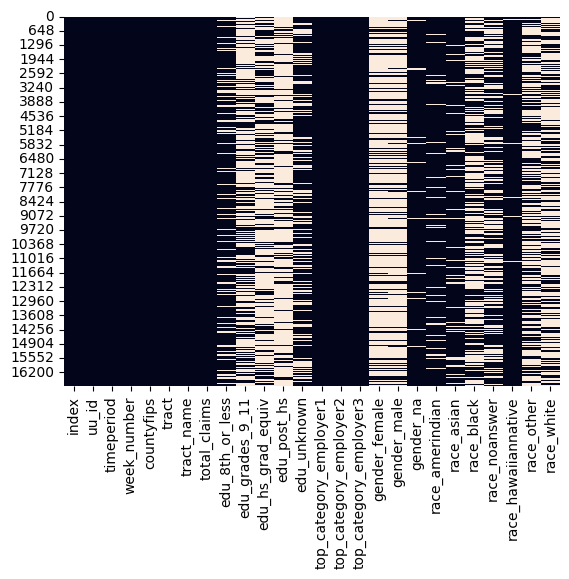

In [16]:
sns.heatmap(unemploy.isnull(),cbar=False)

In [17]:
miss=unemploy.isnull()
total=unemploy.count()
total

index                     16833
uu_id                     16833
timeperiod                16833
week_number               16833
countyfips                16833
tract                     16833
tract_name                16833
total_claims              16833
edu_8th_or_less           13748
edu_grades_9_11            5942
edu_hs_grad_equiv          6036
edu_post_hs                3246
edu_unknown               12031
top_category_employer1    16833
top_category_employer2    16833
top_category_employer3    16833
gender_female              3835
gender_male                3931
gender_na                 15868
race_amerindian           15285
race_asian                14939
race_black                 7124
race_noanswer             10089
race_hawaiiannative       16426
race_other                 8075
race_white                 6392
dtype: int64

In [18]:
miss.sum()

index                         0
uu_id                         0
timeperiod                    0
week_number                   0
countyfips                    0
tract                         0
tract_name                    0
total_claims                  0
edu_8th_or_less            3085
edu_grades_9_11           10891
edu_hs_grad_equiv         10797
edu_post_hs               13587
edu_unknown                4802
top_category_employer1        0
top_category_employer2        0
top_category_employer3        0
gender_female             12998
gender_male               12902
gender_na                   965
race_amerindian            1548
race_asian                 1894
race_black                 9709
race_noanswer              6744
race_hawaiiannative         407
race_other                 8758
race_white                10441
dtype: int64

In [19]:
miss.sum()/len(unemploy)

index                     0.000000
uu_id                     0.000000
timeperiod                0.000000
week_number               0.000000
countyfips                0.000000
tract                     0.000000
tract_name                0.000000
total_claims              0.000000
edu_8th_or_less           0.183271
edu_grades_9_11           0.647003
edu_hs_grad_equiv         0.641419
edu_post_hs               0.807164
edu_unknown               0.285273
top_category_employer1    0.000000
top_category_employer2    0.000000
top_category_employer3    0.000000
gender_female             0.772174
gender_male               0.766471
gender_na                 0.057328
race_amerindian           0.091962
race_asian                0.112517
race_black                0.576784
race_noanswer             0.400642
race_hawaiiannative       0.024179
race_other                0.520288
race_white                0.620270
dtype: float64

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/3923839871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  map_1 = unemploy.corr(method ='spearman')


<AxesSubplot: >

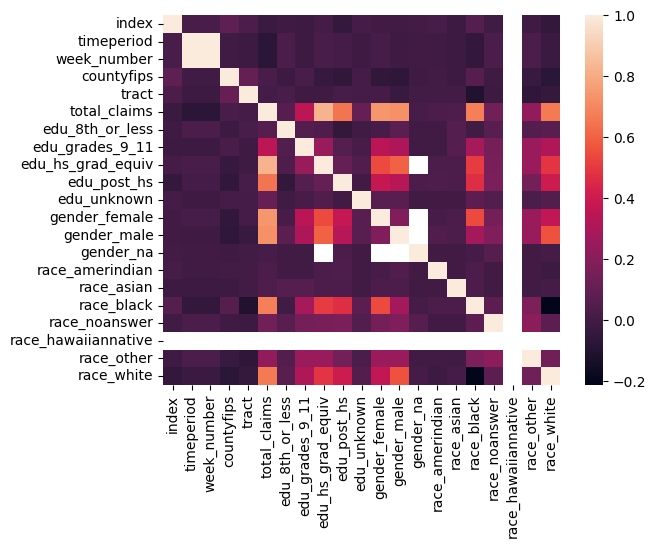

In [20]:
map_1 = unemploy.corr(method ='spearman')
sns.heatmap(map_1)

In [21]:
unemploy["race_hawaiiannative"].unique()

<IntegerArray>
[0, <NA>]
Length: 2, dtype: Int64

In [22]:
df1=unemploy.copy()
df1=df1.drop(columns="race_hawaiiannative")

In [23]:
df=unemploy[['top_category_employer1',"top_category_employer2","top_category_employer3",'uu_id',"tract_name","timeperiod","tract","countyfips"]]

In [24]:
df

,top_category_employer1,top_category_employer2,top_category_employer3,uu_id,tract_name,timeperiod,tract,countyfips
0,23,72,99,9ee08e65a6fc00045b2c609903e65603,"Census Tract 429.01, Lake County, Indiana",20220101,42901,18089
1,56,23,52,184e8a1febbf737c9865b40ac43d92ee,"Census Tract 103.04, Allen County, Indiana",20220101,10304,18003
2,23,56,72,74c5fdc6aac736fa7cf9b5d45c501a03,"Census Tract 20, Delaware County, Indiana",20220101,2000,18035
3,31-33,81,62,370a5fb730297d91eb3443d50582515e,"Census Tract 107, St. Joseph County, Indiana",20220101,10700,18141
4,31-33,81,62,f63ddd4e3eb78163c5b06897f160db5f,"Census Tract 102, St. Joseph County, Indiana",20220101,10200,18141
...,...,...,...,...,...,...,...,...
16828,44-45,56,48-49,a993d47c7143bed2a187b0cac7d17983,"Census Tract 3405, Marion County, Indiana",20220910,340500,18097
16829,62,61,71,592f2bae77a77f0721533ce7f3926d64,"Census Tract 128, Lake County, Indiana",20220910,12800,18089
16830,56,31-33,72,ce8b2c0e11c538921c39c06b298d2393,"Census Tract 709.01, Floyd County, Indiana",20220910,70901,18043
16831,48-49,31-33,44-45,4368ac6502dd50bc209781d0d0f660f4,"Census Tract 9713, Steuben County, Indiana",20220910,971300,18151


In [25]:
df1.drop(columns=['top_category_employer1',"top_category_employer2","top_category_employer3",'uu_id',"tract_name","timeperiod","tract","countyfips"],inplace=True)

In [26]:
impute1=KNNImputer()
impute1.fit(df1)
unemploy1=pd.DataFrame(impute1.fit_transform(df1),columns = df1.columns)

In [27]:
unemploy1

,index,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
0,10697.0,1.0,16.0,0.0,0.0,10.4,13.8,0.0,11.0,17.2,0.0,0.0,0.0,0.0,0.0,0.0,15.2
1,1157.0,1.0,12.0,0.0,2.8,15.8,16.8,0.0,14.6,15.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
2,4713.0,1.0,28.0,0.0,0.0,16.0,13.0,0.0,13.4,15.4,0.0,0.0,0.0,0.0,0.0,0.0,23.0
3,11998.0,1.0,17.0,0.0,0.0,11.0,13.2,0.0,8.2,12.4,0.0,0.0,0.0,0.0,0.0,0.0,10.6
4,11994.0,1.0,13.0,0.0,0.0,14.8,11.2,0.0,8.2,12.4,0.0,0.0,0.0,0.0,0.0,0.0,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,4836.0,37.0,21.0,0.0,10.8,15.0,14.6,0.0,11.8,11.8,0.0,0.0,0.0,17.0,0.0,0.0,12.8
16829,6989.0,37.0,11.0,0.0,0.0,14.8,13.2,0.0,13.4,12.8,0.0,0.0,0.0,11.0,0.0,0.0,0.0
16830,13451.0,37.0,10.0,0.0,0.0,15.8,17.4,0.0,10.8,14.2,0.0,0.0,0.0,0.0,0.0,0.0,12.2
16831,13480.0,37.0,37.0,0.0,0.0,17.6,24.0,0.0,14.4,21.4,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [28]:
trial=pd.merge(df, unemploy1, left_index=True, right_index=True)

In [29]:
trial.head()

,top_category_employer1,top_category_employer2,top_category_employer3,uu_id,tract_name,timeperiod,tract,countyfips,index,week_number,...,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
0,23,72,99,9ee08e65a6fc00045b2c609903e65603,"Census Tract 429.01, Lake County, Indiana",20220101,42901,18089,10697.0,1.0,...,0.0,11.0,17.2,0.0,0.0,0.0,0.0,0.0,0.0,15.2
1,56,23,52,184e8a1febbf737c9865b40ac43d92ee,"Census Tract 103.04, Allen County, Indiana",20220101,10304,18003,1157.0,1.0,...,0.0,14.6,15.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
2,23,56,72,74c5fdc6aac736fa7cf9b5d45c501a03,"Census Tract 20, Delaware County, Indiana",20220101,2000,18035,4713.0,1.0,...,0.0,13.4,15.4,0.0,0.0,0.0,0.0,0.0,0.0,23.0
3,31-33,81,62,370a5fb730297d91eb3443d50582515e,"Census Tract 107, St. Joseph County, Indiana",20220101,10700,18141,11998.0,1.0,...,0.0,8.2,12.4,0.0,0.0,0.0,0.0,0.0,0.0,10.6
4,31-33,81,62,f63ddd4e3eb78163c5b06897f160db5f,"Census Tract 102, St. Joseph County, Indiana",20220101,10200,18141,11994.0,1.0,...,0.0,8.2,12.4,0.0,0.0,0.0,0.0,0.0,0.0,10.6


In [30]:
trial.describe()

,timeperiod,tract,countyfips,index,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
count,16833.0,16833.0,16833.0,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000,16833.000000
mean,20220540.093329,211605.900315,18088.919682,8416.000000,21.329531,22.952712,0.056449,1.345975,15.869483,14.079309,0.131028,14.963381,15.838555,0.005549,0.010052,0.018559,8.683562,0.198883,0.546747,14.602127
std,268.366832,288715.02492,41.019467,4859.412876,11.618554,14.583655,1.012247,4.038637,8.597765,6.220836,1.559206,6.740005,6.813998,0.442958,0.470250,0.563722,12.052668,2.042296,2.663552,8.676789
min,20220101.0,100.0,18001.0,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20220312.0,10100.0,18063.0,4208.000000,11.000000,14.000000,0.000000,0.000000,12.000000,11.200000,0.000000,12.000000,12.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,20220528.0,42801.0,18095.0,8416.000000,22.000000,18.000000,0.000000,0.000000,13.800000,13.200000,0.000000,13.600000,14.200000,0.000000,0.000000,0.000000,4.200000,0.000000,0.000000,13.600000
75%,20220806.0,342600.0,18103.0,12624.000000,32.000000,27.000000,0.000000,0.000000,16.800000,15.800000,0.000000,15.800000,16.800000,0.000000,0.000000,0.000000,13.600000,0.000000,0.000000,17.000000
max,20220910.0,976400.0,18183.0,16832.000000,37.000000,170.000000,41.000000,78.000000,137.000000,154.000000,60.000000,126.000000,139.000000,49.000000,36.000000,41.000000,163.000000,110.000000,74.000000,155.000000


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/3998575015.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(trial.corr(method="spearman"))


<AxesSubplot: >

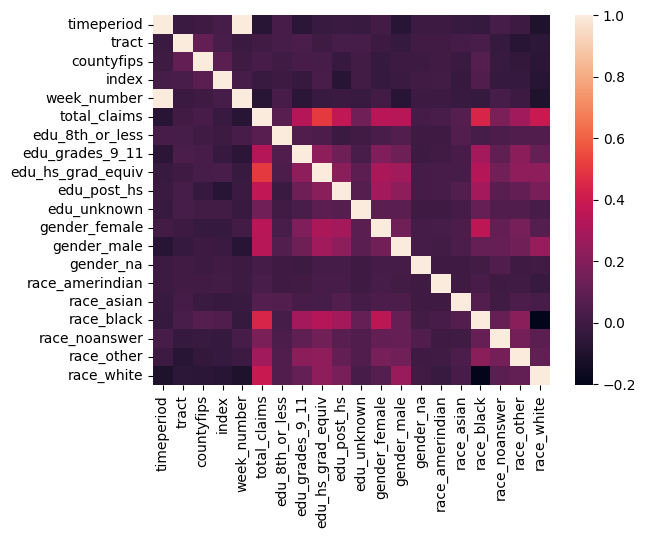

In [31]:
sns.heatmap(trial.corr(method="spearman"))

In [32]:
trial1=trial.copy()

In [33]:
scaler = StandardScaler()
scaled=pd.DataFrame(scaler.fit_transform(unemploy1),columns = unemploy1.columns)

In [34]:
scaled

,index,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
0,0.469412,-1.749799,-0.476761,-0.055767,-0.333284,-0.636171,-0.044900,-0.084038,-0.588056,0.199807,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,0.068907
1,-1.493846,-1.749799,-0.751049,-0.055767,0.360039,-0.008082,0.437364,-0.084038,-0.053916,-0.123067,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,-0.184651
2,-0.762049,-1.749799,0.346102,-0.055767,-0.333284,0.015181,-0.173504,-0.084038,-0.231962,-0.064363,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,0.967884
3,0.737148,-1.749799,-0.408189,-0.055767,-0.333284,-0.566383,-0.141353,-0.084038,-1.003498,-0.504646,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,-0.461259
4,0.736325,-1.749799,-0.682477,-0.055767,-0.333284,-0.124394,-0.462863,-0.084038,-1.003498,-0.504646,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,-0.461259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,-0.736736,1.348785,-0.133901,-0.055767,2.340964,-0.101132,0.083704,-0.084038,-0.469358,-0.592703,-0.012527,-0.021376,-0.032923,0.690029,-0.097385,-0.205276,-0.207701
16829,-0.293666,1.348785,-0.819621,-0.055767,-0.333284,-0.124394,-0.141353,-0.084038,-0.231962,-0.445942,-0.012527,-0.021376,-0.032923,0.192199,-0.097385,-0.205276,-1.682945
16830,1.036164,1.348785,-0.888193,-0.055767,-0.333284,-0.008082,0.533817,-0.084038,-0.617730,-0.240476,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,-0.276853
16831,1.042132,1.348785,0.963250,-0.055767,-0.333284,0.201281,1.594799,-0.084038,-0.083590,0.816204,-0.012527,-0.021376,-0.032923,-0.720489,-0.097385,-0.205276,1.428897


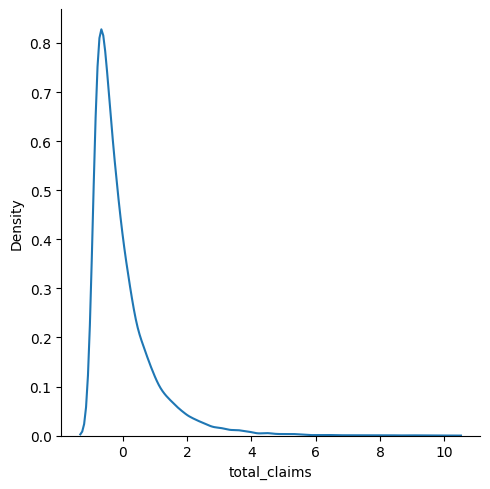

In [35]:
sns.displot(data=scaled,x="total_claims",kind="kde")

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/107298841.py:2: RuntimeWarning: invalid value encountered in sqrt
  sqrt_claim = np.sqrt(claim)
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/107298841.py:3: RuntimeWarning: invalid value encountered in log
  log_claim = np.log(claim)


(array([450.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        419.,   0.,   0., 397., 355., 332., 299., 471., 670., 498., 493.,
        455., 433., 320., 203., 133.,  67.,  27.,  15.]),
 array([-5.73136905, -5.46329399, -5.19521894, -4.92714389, -4.65906884,
        -4.39099379, -4.12291873, -3.85484368, -3.58676863, -3.31869358,
        -3.05061853, -2.78254347, -2.51446842, -2.24639337, -1.97831832,
        -1.71024327, -1.44216821, -1.17409316, -0.90601811, -0.63794306,
        -0.369868  , -0.10179295,  0.1662821 ,  0.43435715,  0.7024322 ,
         0.97050726,  1.23858231,  1.50665736,  1.77473241,  2.04280746,
         2.31088252]),
 <BarContainer object of 30 artists>)

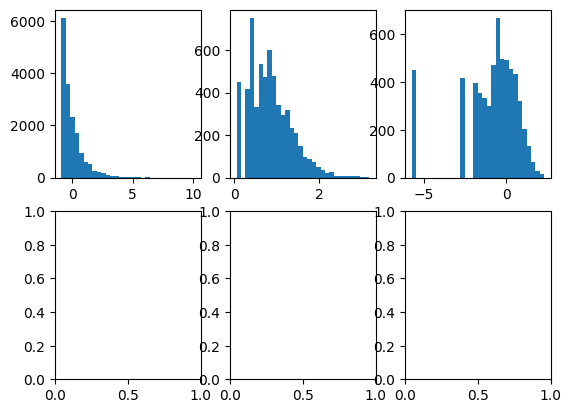

In [36]:
claim = np.array(scaled["total_claims"])
sqrt_claim = np.sqrt(claim)
log_claim = np.log(claim)
f, ((f1, f2, f3), (f4, f5, f6)) = plt.subplots(2, 3)
#f, ((f1, f2), (f4, f5)) = plt.subplots(2, 2)
f1.hist(claim, 30)
f2.hist(sqrt_claim, 30)
f3.hist(log_claim, 30)

In [37]:
stats.probplot(claim, plot=f4)
stats.probplot(sqrt_claim, plot=f5)
stats.probplot(log_claim, plot=f6)
plt.show
stats.shapiro(claim)[1], stats.shapiro(sqrt_claim)[1], stats.shapiro(log_claim)[1]

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.0, 1.0, 1.0)

In [38]:
shapiro(sqrt_claim)

ShapiroResult(statistic=nan, pvalue=1.0)

In [39]:
print(skew(sqrt_claim))

nan


In [40]:
shapiro(unemploy1.total_claims)

ShapiroResult(statistic=0.7496511340141296, pvalue=0.0)

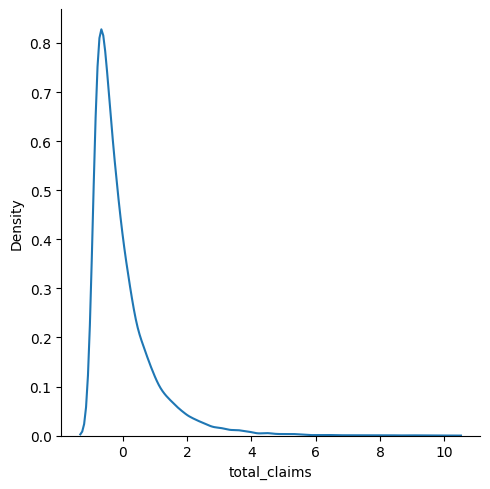

In [41]:
sns.displot(data=scaled,x="total_claims",kind="kde")

In [42]:
f3.hist(log_claim, 30)

(array([450.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        419.,   0.,   0., 397., 355., 332., 299., 471., 670., 498., 493.,
        455., 433., 320., 203., 133.,  67.,  27.,  15.]),
 array([-5.73136905, -5.46329399, -5.19521894, -4.92714389, -4.65906884,
        -4.39099379, -4.12291873, -3.85484368, -3.58676863, -3.31869358,
        -3.05061853, -2.78254347, -2.51446842, -2.24639337, -1.97831832,
        -1.71024327, -1.44216821, -1.17409316, -0.90601811, -0.63794306,
        -0.369868  , -0.10179295,  0.1662821 ,  0.43435715,  0.7024322 ,
         0.97050726,  1.23858231,  1.50665736,  1.77473241,  2.04280746,
         2.31088252]),
 <BarContainer object of 30 artists>)

In [43]:
import pylab

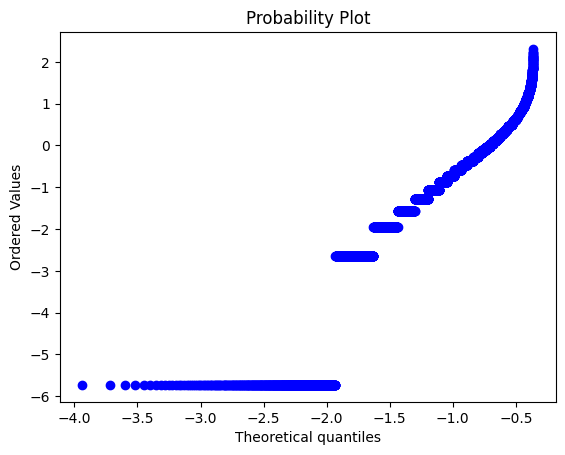

In [44]:
stats.probplot(log_claim,dist="norm",plot=pylab)
pylab.show()

In [45]:
sns.distplot(une)

NameError: name 'une' is not defined

In [46]:
sns.boxplot(x=scale_logs["edu_grades_9_11"])

NameError: name 'scale_logs' is not defined

In [47]:
unemploy_logs = np.log(unemploy1)

/opt/homebrew/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [48]:
unemp_cube=np.power((unemploy1),1/3)

In [49]:
statistics,pvalue = jarque_bera(unemp_cube)

NameError: name 'jarque_bera' is not defined

In [50]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

NameError: name 'statistics' is not defined

In [51]:
from scipy.stats import jarque_bera

In [52]:
statistics,pvalue = jarque_bera(unemp_cube)

In [53]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=2675061.878, p=0.000

Probably not Normal


In [54]:
statistics,pvalue = jarque_bera(unemp_cube["edu_grades_9_11"])

In [55]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=14561.364, p=0.000

Probably not Normal


In [56]:
statistics,pvalue = jarque_bera(unemploy1["edu_grades_9_11"])

In [57]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=1086464.810, p=0.000

Probably not Normal


In [58]:
statistics,pvalue = jarque_bera(unemploy1["gender_male"])

In [59]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=1174368.211, p=0.000

Probably not Normal


In [60]:
statistics,pvalue = jarque_bera(unemploy1["gender_female"])

In [61]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=1045341.428, p=0.000

Probably not Normal


In [62]:
statistics,pvalue = jarque_bera(unemploy1["gender_na"])

In [63]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=66594206233.188, p=0.000

Probably not Normal


In [64]:
statistics,pvalue = jarque_bera(unemploy1["race_white"])

In [65]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=196076.328, p=0.000

Probably not Normal


In [66]:
statistics,pvalue = jarque_bera(unemploy1["race_black"])

In [67]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=154215.891, p=0.000

Probably not Normal


In [68]:
statistics,pvalue = jarque_bera(unemploy1["race_ameriindia"])

KeyError: 'race_ameriindia'

In [69]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=154215.891, p=0.000

Probably not Normal


In [70]:
statistics,pvalue = jarque_bera(unemploy1["race_amerindian"])

In [71]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=8130568003.177, p=0.000

Probably not Normal


In [72]:
statistics,pvalue = jarque_bera(unemploy1["race_asian"])

In [73]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=4301958091.498, p=0.000

Probably not Normal


In [74]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import shapiro
from scipy.stats import skew

In [75]:
import numpy as np
from numpy import isnan
from matplotlib import pyplot

In [76]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px

In [77]:
import pandas as pd

In [78]:
transformed_data, best_lambda = boxcox(unemploy1)
sns.distpolt(transformed_data,)

ValueError: Data must be 1-dimensional.

In [79]:
transformed_data, best_lambda = boxcox(unemploy1["total_claims"])
sns.distpolt(transformed_data,)

AttributeError: module 'seaborn' has no attribute 'distpolt'

In [80]:
transformed_data, best_lambda = boxcox(unemploy1["total_claims"])
sns.distpolt(transformed_data)

AttributeError: module 'seaborn' has no attribute 'distpolt'

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/4252566566.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data)


<AxesSubplot: ylabel='Density'>

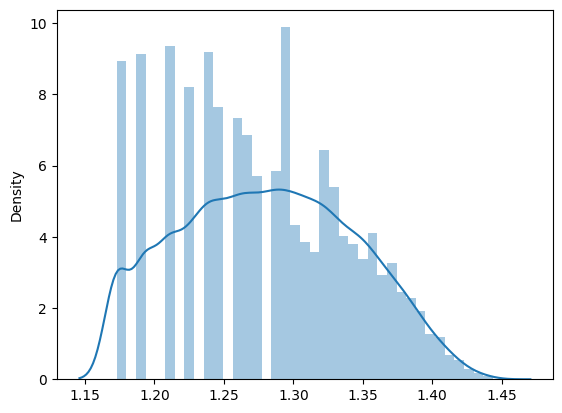

In [81]:
transformed_data, best_lambda = boxcox(unemploy1["total_claims"])
sns.distplot(transformed_data)

In [82]:
claim = np.array(transformed_data)
sqrt_claim = np.sqrt(transformed_data)
log_claim = np.logtransformed_data)
f, ((f1, f2, f3), (f4, f5, f6)) = plt.subplots(2, 3)
#f, ((f1, f2), (f4, f5)) = plt.subplots(2, 2)
f1.hist(claim, 30)
f2.hist(sqrt_claim, 30)
f3.hist(log_claim, 30)

SyntaxError: unmatched ')' (1760459961.py, line 3)

In [83]:
stats.probplot(claim, plot=f4)
stats.probplot(sqrt_claim, plot=f5)
stats.probplot(log_claim, plot=f6)
plt.show
stats.shapiro(claim)[1], stats.shapiro(sqrt_claim)[1], stats.shapiro(log_claim)[1]

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.0, 1.0, 1.0)

(array([1045.,    0., 1066.,    0., 1092.,    0.,  960., 1073.,    0.,
         895.,  856.,  800.,  666., 1283.,  555.,  955.,  816.,  687.,
         534.,  680.,  724.,  493.,  455.,  395.,  309.,  205.,  148.,
          86.,   36.,   19.]),
 array([0.15948303, 0.16640777, 0.17333251, 0.18025725, 0.18718199,
        0.19410673, 0.20103147, 0.20795621, 0.21488095, 0.22180569,
        0.22873043, 0.23565517, 0.24257991, 0.24950465, 0.25642939,
        0.26335413, 0.27027887, 0.27720361, 0.28412835, 0.29105309,
        0.29797783, 0.30490257, 0.31182731, 0.31875205, 0.32567679,
        0.33260153, 0.33952627, 0.34645101, 0.35337575, 0.36030049,
        0.36722523]),
 <BarContainer object of 30 artists>)

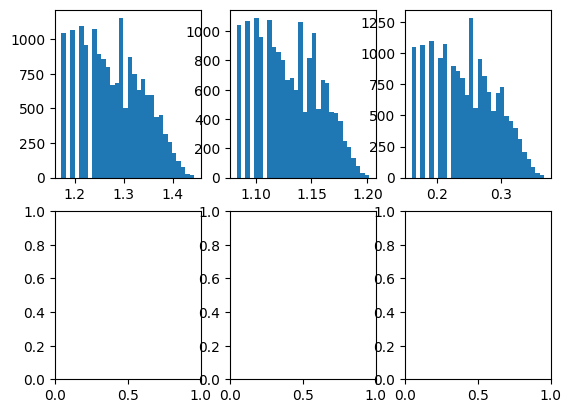

In [84]:
claim = np.array(transformed_data)
sqrt_claim = np.sqrt(transformed_data)
log_claim = np.log(transformed_data)
f, ((f1, f2, f3), (f4, f5, f6)) = plt.subplots(2, 3)
#f, ((f1, f2), (f4, f5)) = plt.subplots(2, 2)
f1.hist(claim, 30)
f2.hist(sqrt_claim, 30)
f3.hist(log_claim, 30)

In [85]:
stats.probplot(claim, plot=f4)
stats.probplot(sqrt_claim, plot=f5)
stats.probplot(log_claim, plot=f6)
plt.show
stats.shapiro(claim)[1], stats.shapiro(sqrt_claim)[1], stats.shapiro(log_claim)[1]

(2.802596928649634e-45, 2.802596928649634e-45, 1.401298464324817e-45)

In [86]:
statistics,pvalue = jarque_bera(transformed_data)

In [87]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=530.423, p=0.000

Probably not Normal


In [88]:
statistics,pvalue = jarque_bera(log_claims)

NameError: name 'log_claims' is not defined

In [89]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=530.423, p=0.000

Probably not Normal


In [90]:
statistics,pvalue = jarque_bera(log_claim)

In [91]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=537.883, p=0.000

Probably not Normal


In [92]:
statistics,pvalue = jarque_bera(sqrt_claim)

In [93]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=531.780, p=0.000

Probably not Normal


In [94]:
statistics,pvalue = jarque_bera(claim)

In [95]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=530.423, p=0.000

Probably not Normal


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/3419981817.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data)


TypeError: boolean value of NA is ambiguous

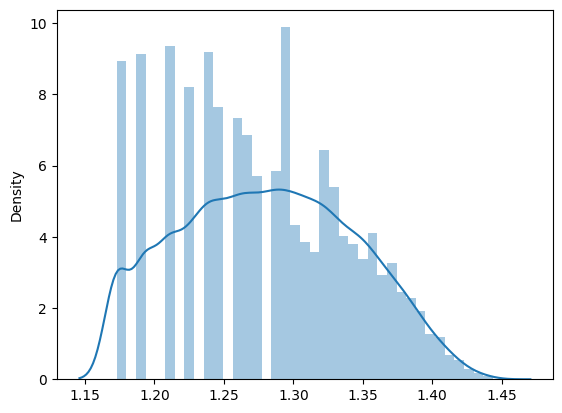

In [96]:
transformed_data, best_lambda = boxcox(unemploy1["total_claims"])
sns.distplot(transformed_data)
ed_9_11=boxcox(unemploy["edu_grades_9_11"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/2955841387.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data)


ValueError: Data must be positive.

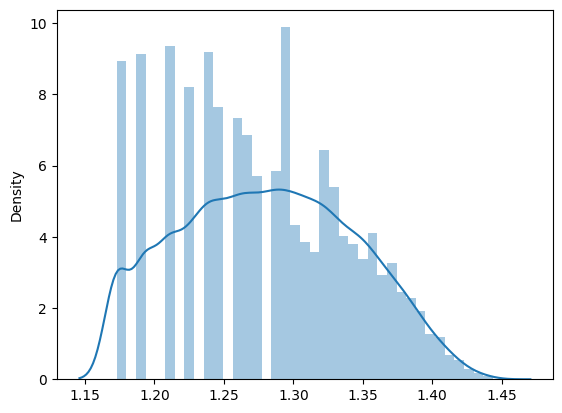

In [97]:
transformed_data, best_lambda = boxcox(unemploy1["total_claims"])
sns.distplot(transformed_data)
ed_9_11=boxcox(unemploy1["edu_grades_9_11"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/2697484528.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["edu_grades_9_11"])


<AxesSubplot: xlabel='edu_grades_9_11', ylabel='Density'>

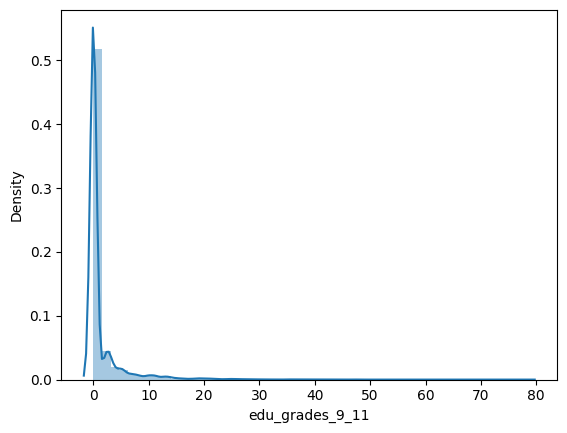

In [98]:
transformed_data, best_lambda = boxcox(unemploy1["total_claims"])
sns.distplot(unemploy1["edu_grades_9_11"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/961104283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["race_white"])


<AxesSubplot: xlabel='race_white', ylabel='Density'>

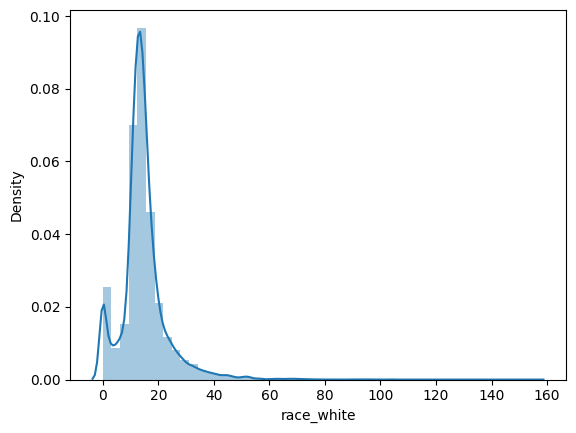

In [99]:
transformed_data, best_lambda = boxcox(unemploy1["total_claims"])
sns.distplot(unemploy1["race_white"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/674691519.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["race_black"])


<AxesSubplot: xlabel='race_black', ylabel='Density'>

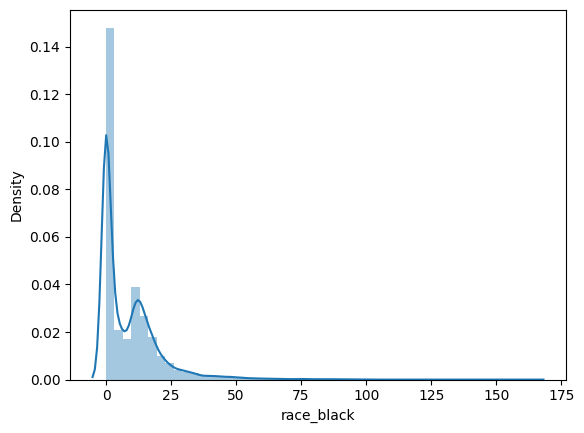

In [100]:
transformed_data, best_lambda = boxcox(unemploy1["total_claims"])
sns.distplot(unemploy1["race_black"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/3600457888.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["race_amerindian"])


<AxesSubplot: xlabel='race_amerindian', ylabel='Density'>

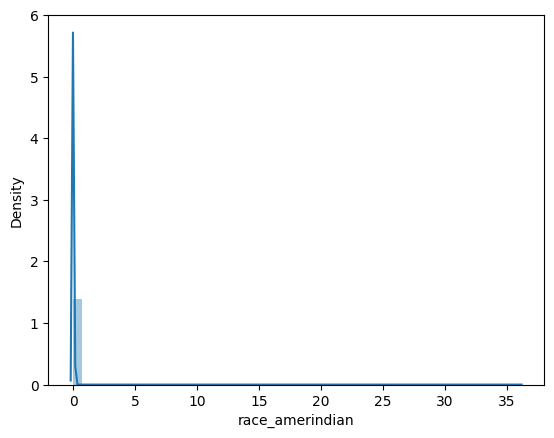

In [101]:
transformed_data, best_lambda = boxcox(unemploy1["total_claims"])
sns.distplot(unemploy1["race_amerindian"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/1069011629.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["race_asian"])


<AxesSubplot: xlabel='race_asian', ylabel='Density'>

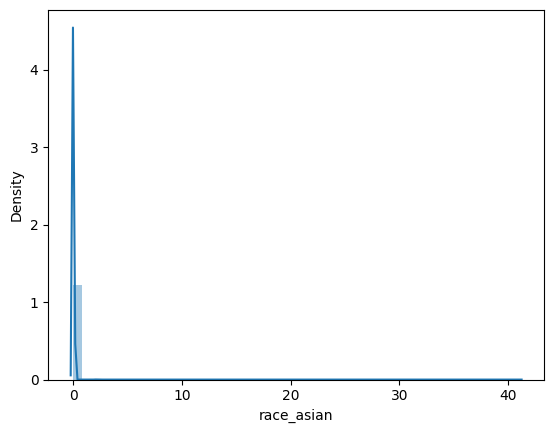

In [102]:
transformed_data, best_lambda = boxcox(unemploy1["total_claims"])
sns.distplot(unemploy1["race_asian"])

In [103]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [104]:
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import shapiro
from scipy.stats import skew

In [105]:
import numpy as np
from numpy import isnan
from matplotlib import pyplot

In [106]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px

In [107]:
import pandas as pd

In [108]:
scaler= MinMaxScaler()
scaler.fit(unemploy1)
# transform the test test
scaled1 = scaler.transform(unemploy1)

In [109]:
scaler

MinMaxScaler()

In [110]:
scaled1

array([[0.63551568, 0.        , 0.0375    , ..., 0.        , 0.        ,
        0.09806452],
       [0.06873812, 0.        , 0.0125    , ..., 0.        , 0.        ,
        0.08387097],
       [0.28000238, 0.        , 0.1125    , ..., 0.        , 0.        ,
        0.1483871 ],
       ...,
       [0.7991326 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.07870968],
       [0.80085551, 1.        , 0.16875   , ..., 0.        , 0.        ,
        0.17419355],
       [0.42407319, 1.        , 0.1625    , ..., 0.        , 0.        ,
        0.1483871 ]])

In [111]:
scaler= MinMaxScaler()
# transform the test test
scaled1 = pd.DataFrame(scaler.transform_fit(unemploy1),columns=unemploy1.columns)

AttributeError: 'MinMaxScaler' object has no attribute 'transform_fit'

In [112]:
scaler= MinMaxScaler()
# transform the test test
scaled1 = pd.DataFrame(scaler.fit_transform(unemploy1),columns=unemploy1.columns)

In [113]:
scaled1

,index,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
0,0.635516,0.0,0.03750,0.0,0.000000,0.075912,0.089610,0.0,0.087302,0.123741,0.0,0.0,0.0,0.000000,0.0,0.0,0.098065
1,0.068738,0.0,0.01250,0.0,0.035897,0.115328,0.109091,0.0,0.115873,0.107914,0.0,0.0,0.0,0.000000,0.0,0.0,0.083871
2,0.280002,0.0,0.11250,0.0,0.000000,0.116788,0.084416,0.0,0.106349,0.110791,0.0,0.0,0.0,0.000000,0.0,0.0,0.148387
3,0.712809,0.0,0.04375,0.0,0.000000,0.080292,0.085714,0.0,0.065079,0.089209,0.0,0.0,0.0,0.000000,0.0,0.0,0.068387
4,0.712571,0.0,0.01875,0.0,0.000000,0.108029,0.072727,0.0,0.065079,0.089209,0.0,0.0,0.0,0.000000,0.0,0.0,0.068387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,0.287310,1.0,0.06875,0.0,0.138462,0.109489,0.094805,0.0,0.093651,0.084892,0.0,0.0,0.0,0.104294,0.0,0.0,0.082581
16829,0.415221,1.0,0.00625,0.0,0.000000,0.108029,0.085714,0.0,0.106349,0.092086,0.0,0.0,0.0,0.067485,0.0,0.0,0.000000
16830,0.799133,1.0,0.00000,0.0,0.000000,0.115328,0.112987,0.0,0.085714,0.102158,0.0,0.0,0.0,0.000000,0.0,0.0,0.078710
16831,0.800856,1.0,0.16875,0.0,0.000000,0.128467,0.155844,0.0,0.114286,0.153957,0.0,0.0,0.0,0.000000,0.0,0.0,0.174194


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/69608292.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled1["total_claims"])


<AxesSubplot: xlabel='total_claims', ylabel='Density'>

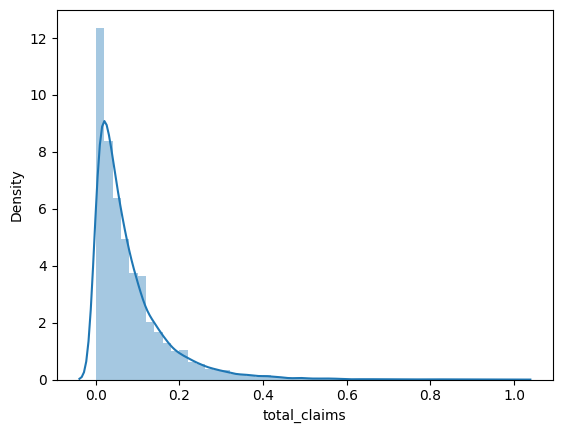

In [114]:
sns.distplot(scaled1["total_claims"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/4192346795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled1["race_asian"])


<AxesSubplot: xlabel='race_asian', ylabel='Density'>

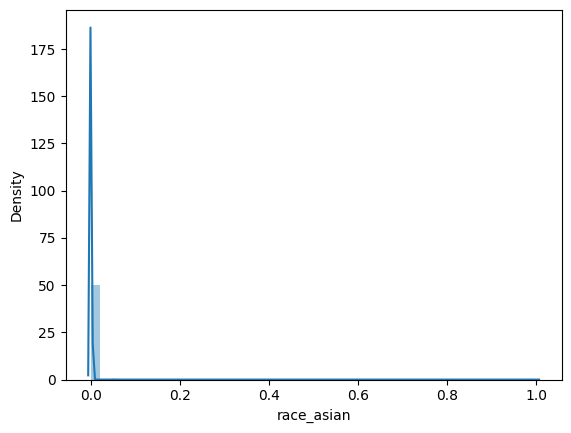

In [115]:
sns.distplot(scaled1["race_asian"])

In [116]:
unemploy1["race_asian"].unique()

array([ 0. ,  2. ,  2.4,  4. ,  4.8, 20. , 13. ,  5.2, 10. , 19. ,  8.2,
       24. ,  3.8,  2.2, 11. , 41. , 12. , 26. , 21. ])

In [117]:
unemploy1["race_asian"].unique().count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [118]:
unemploy1["race_asian"].unique().counts()

AttributeError: 'numpy.ndarray' object has no attribute 'counts'

In [119]:
unemploy1["race_asian"].unique().counts

AttributeError: 'numpy.ndarray' object has no attribute 'counts'

In [120]:
unemploy_ish=pd.DataFrame(np.arcsinh(unemploy1),columns=unemploy1)

ValueError: Index data must be 1-dimensional

In [121]:
unemploy_ish=pd.DataFrame(np.arcsinh(unemploy1["edu_hs_grad_quiv"]))

KeyError: 'edu_hs_grad_quiv'

In [122]:
unemploy_ish=pd.DataFrame(np.arcsinh(unemploy1["edu_hs_grad_equiv"]))

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/4262373879.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy_ish)


<AxesSubplot: ylabel='Density'>

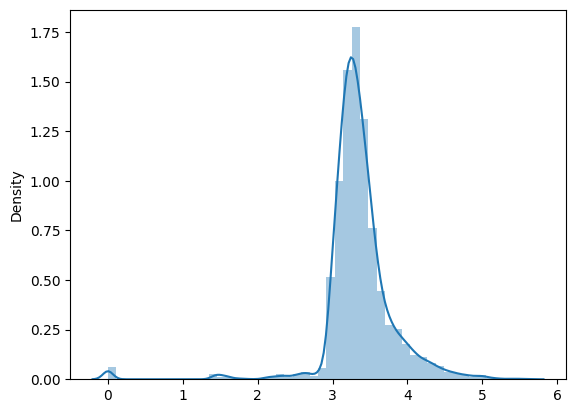

In [123]:
unemploy_ish=pd.DataFrame(np.arcsinh(unemploy1["edu_hs_grad_equiv"]))
sns.distplot(unemploy_ish)

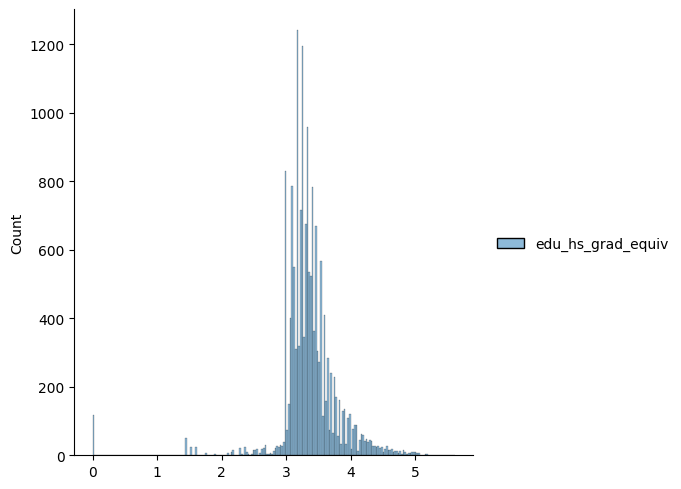

In [124]:
unemploy_ish=pd.DataFrame(np.arcsinh(unemploy1["edu_hs_grad_equiv"]))
sns.displot(unemploy_ish)

In [125]:
statistics,pvalue = jarque_bera(unemploy_ish)

In [126]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=227686.745, p=0.000

Probably not Normal


In [127]:
stats.probplot(unemploy_ish)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 16833 and the array at index 1 has size 1

In [128]:
unemploy_ish

,edu_hs_grad_equiv
0,3.037256
1,3.454157
2,3.466711
3,3.093102
4,3.388914
...,...
16828,3.402307
16829,3.388914
16830,3.454157
16831,3.561852


In [129]:
stats.probplot(unemploy_ish,dist="norm",plot=pylab)
pylab.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 16833 and the array at index 1 has size 1

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/4262373879.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy_ish)


<AxesSubplot: ylabel='Density'>

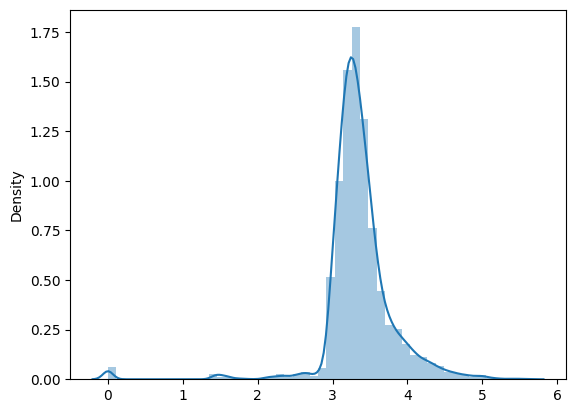

In [130]:
unemploy_ish=pd.DataFrame(np.arcsinh(unemploy1["edu_hs_grad_equiv"]))
sns.distplot(unemploy_ish)

In [131]:
unemploy_ish

,edu_hs_grad_equiv
0,3.037256
1,3.454157
2,3.466711
3,3.093102
4,3.388914
...,...
16828,3.402307
16829,3.388914
16830,3.454157
16831,3.561852


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/277459935.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy_ish)


<AxesSubplot: ylabel='Density'>

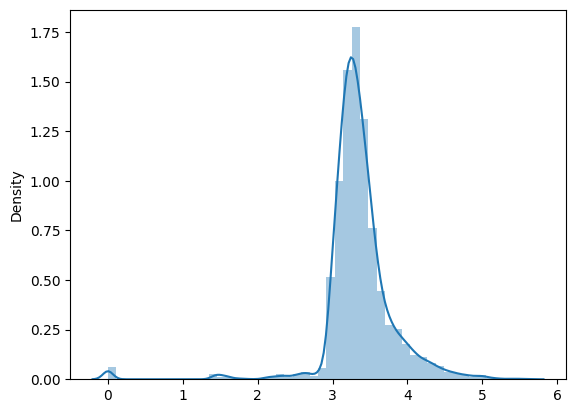

In [132]:
unemploy_ish1=np.arcsinh(unemploy1["edu_hs_grad_equiv"])
sns.distplot(unemploy_ish)

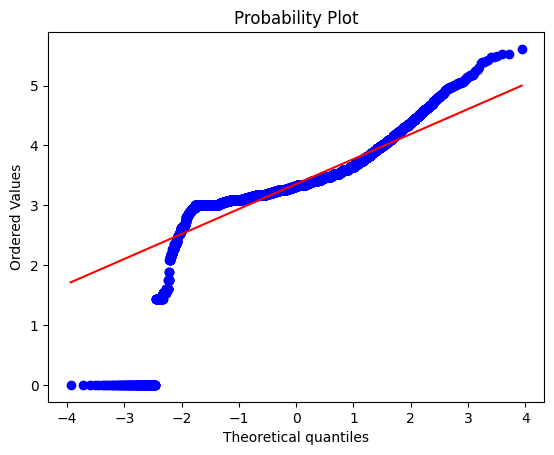

In [133]:
stats.probplot(unemploy_ish1,dist="norm",plot=pylab)
pylab.show()

In [134]:
statistics,pvalue = jarque_bera(unemploy_ish1)

In [135]:
print('statistics=%.3f, p=%.3f\n' %(statistics, pvalue))
if pvalue>0.05:
    print("Probably Normal")
else:
    print("Probably not Normal")

statistics=227686.745, p=0.000

Probably not Normal


In [136]:
unemploy_ish=pd.DataFrame(np.arcsinh(unemploy1["edu_hs_grad_equiv"]))
unemployed_ish=boxcox.fit_transform(unemploy_ish)
sns.distplot(unemployed_ish)

AttributeError: 'function' object has no attribute 'fit_transform'

In [137]:
unemploy_ish=pd.DataFrame(np.arcsinh(unemploy1["edu_hs_grad_equiv"]))
unemployed_ish=boxcox.transform_fit(unemploy_ish)
sns.distplot(unemployed_ish)

AttributeError: 'function' object has no attribute 'transform_fit'

In [138]:
unemploy_ish=pd.DataFrame(np.arcsinh(unemploy1["edu_hs_grad_equiv"]))
unemployed_ish=boxcox(unemploy_ish)
sns.distplot(unemployed_ish)

ValueError: Data must be 1-dimensional.

In [139]:
unemploy1["gender_male"]

0        17.2
1        15.0
2        15.4
3        12.4
4        12.4
         ... 
16828    11.8
16829    12.8
16830    14.2
16831    21.4
16832    16.0
Name: gender_male, Length: 16833, dtype: float64

In [140]:
unemploy1

,index,week_number,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white
0,10697.0,1.0,16.0,0.0,0.0,10.4,13.8,0.0,11.0,17.2,0.0,0.0,0.0,0.0,0.0,0.0,15.2
1,1157.0,1.0,12.0,0.0,2.8,15.8,16.8,0.0,14.6,15.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
2,4713.0,1.0,28.0,0.0,0.0,16.0,13.0,0.0,13.4,15.4,0.0,0.0,0.0,0.0,0.0,0.0,23.0
3,11998.0,1.0,17.0,0.0,0.0,11.0,13.2,0.0,8.2,12.4,0.0,0.0,0.0,0.0,0.0,0.0,10.6
4,11994.0,1.0,13.0,0.0,0.0,14.8,11.2,0.0,8.2,12.4,0.0,0.0,0.0,0.0,0.0,0.0,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,4836.0,37.0,21.0,0.0,10.8,15.0,14.6,0.0,11.8,11.8,0.0,0.0,0.0,17.0,0.0,0.0,12.8
16829,6989.0,37.0,11.0,0.0,0.0,14.8,13.2,0.0,13.4,12.8,0.0,0.0,0.0,11.0,0.0,0.0,0.0
16830,13451.0,37.0,10.0,0.0,0.0,15.8,17.4,0.0,10.8,14.2,0.0,0.0,0.0,0.0,0.0,0.0,12.2
16831,13480.0,37.0,37.0,0.0,0.0,17.6,24.0,0.0,14.4,21.4,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [141]:
Q1 = np.percentile(unemploy1["total_claims"], 25,
                   interpolation = 'midpoint')

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/2555999365.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(unemploy1["total_claims"], 25,


In [142]:
Q3 = np.percentile(unemploy1["total_claims"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/2148565205.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(unemploy1["total_claims"], 75,


In [143]:
print("Old Shape: ", unemploy1.shape)

Old Shape:  (16833, 17)


In [144]:
# Upper bound
upper = np.where(unemploy1["total_claims"]>= (Q3+1.5*IQR))
# Lower bound
lower = np.where(unemploy1["total_claims"]<= (Q1-1.5*IQR))

In [145]:
''' Removing the Outliers '''
unemploy1.drop(upper[0], inplace = True)
unemploy1.drop(lower[0], inplace = True)

In [146]:
print("New Shape: ", unemploy1.shape)

New Shape:  (15728, 17)


In [147]:
unemploy1.shape

(15728, 17)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/3583190284.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["total_claims"])


<AxesSubplot: xlabel='total_claims', ylabel='Density'>

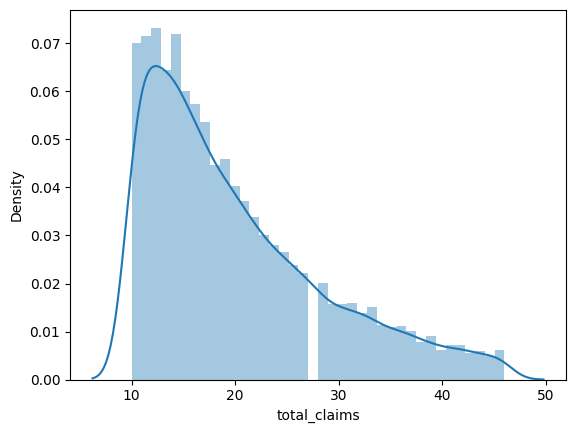

In [148]:
sns.distplot(unemploy1["total_claims"])

<AxesSubplot: xlabel='total_claims', ylabel='Count'>

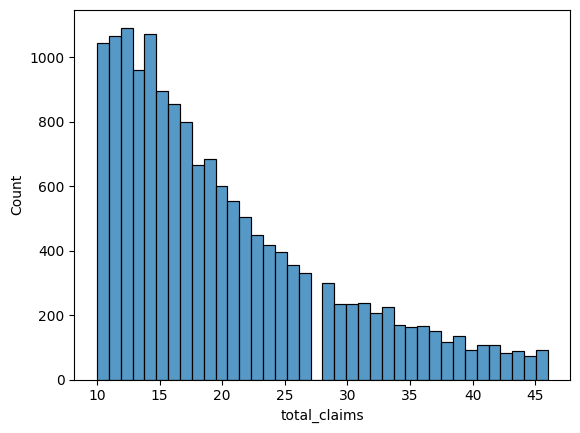

In [149]:
sns.histplot(unemploy1["total_claims"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/3583190284.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["total_claims"])


<AxesSubplot: xlabel='total_claims', ylabel='Density'>

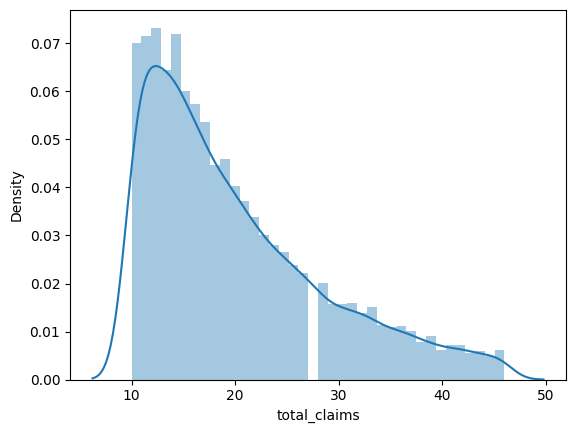

In [150]:
sns.distplot(unemploy1["total_claims"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/3603914821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1)


<AxesSubplot: ylabel='Density'>

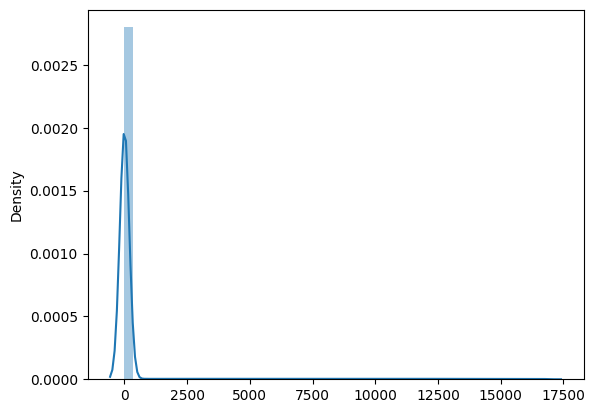

In [151]:
sns.distplot(unemploy1)

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/2624620282.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["gender_male"])


<AxesSubplot: xlabel='gender_male', ylabel='Density'>

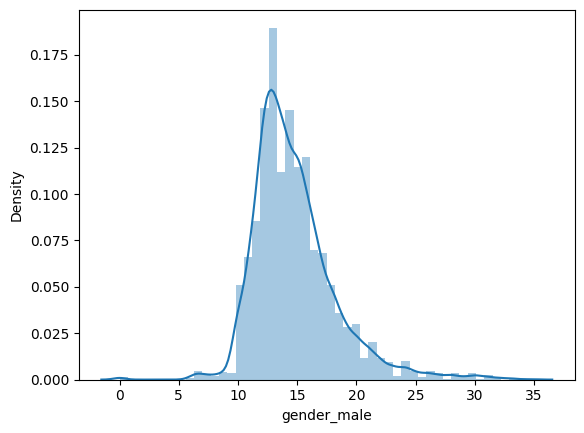

In [152]:
sns.distplot(unemploy1["gender_male"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/709670360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["gender_female"])


<AxesSubplot: xlabel='gender_female', ylabel='Density'>

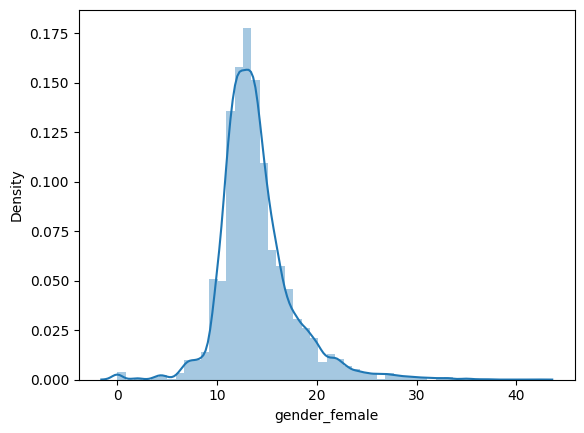

In [153]:
sns.distplot(unemploy1["gender_female"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/1343574679.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["gender_na"])


<AxesSubplot: xlabel='gender_na', ylabel='Density'>

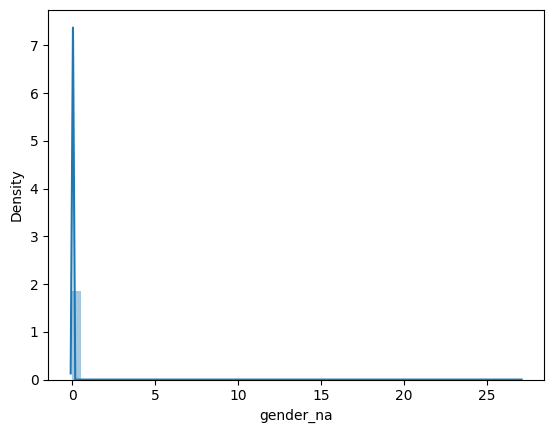

In [154]:
sns.distplot(unemploy1["gender_na"])

In [155]:
sns.distplot(unemploy1["race_whaite"])

KeyError: 'race_whaite'

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/1908981256.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["race_white"])


<AxesSubplot: xlabel='race_white', ylabel='Density'>

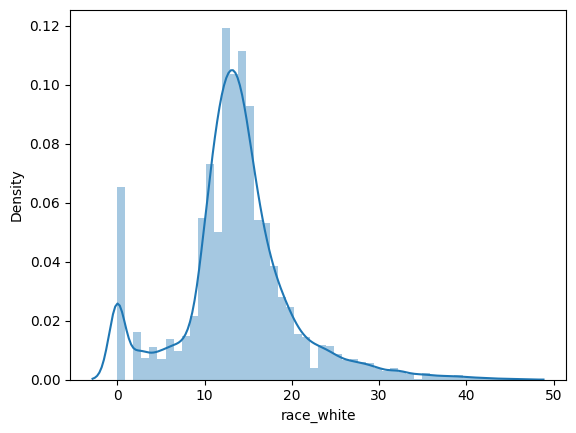

In [156]:
sns.distplot(unemploy1["race_white"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/3907824986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["race_black"])


<AxesSubplot: xlabel='race_black', ylabel='Density'>

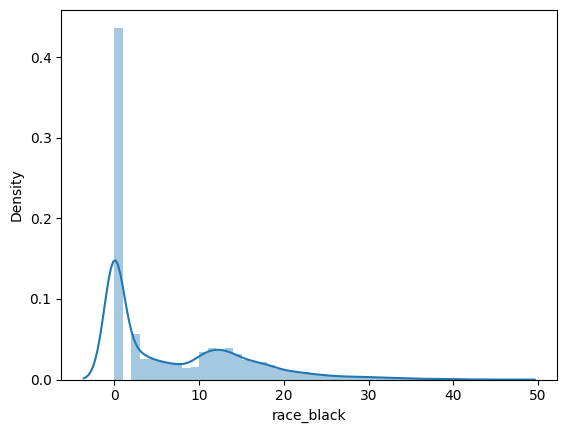

In [157]:
sns.distplot(unemploy1["race_black"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/1124516915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["race_amerindian"])


<AxesSubplot: xlabel='race_amerindian', ylabel='Density'>

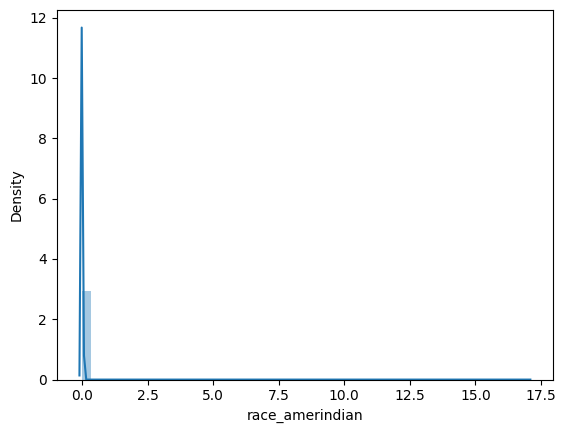

In [158]:
sns.distplot(unemploy1["race_amerindian"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/377127888.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["race_asian"])


<AxesSubplot: xlabel='race_asian', ylabel='Density'>

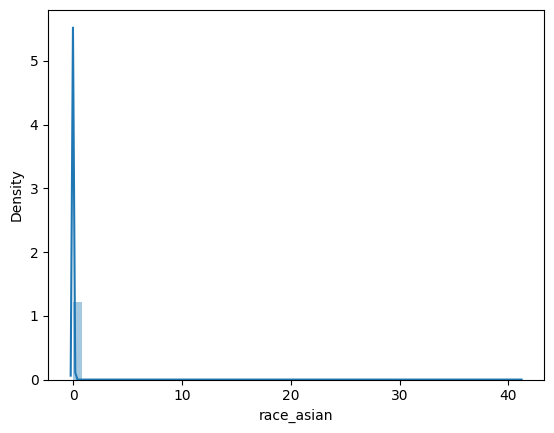

In [159]:
sns.distplot(unemploy1["race_asian"])

In [160]:
sns.distplot(unemploy1["race_noanswere"])

KeyError: 'race_noanswere'

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/2785062995.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["race_noanswer"])


<AxesSubplot: xlabel='race_noanswer', ylabel='Density'>

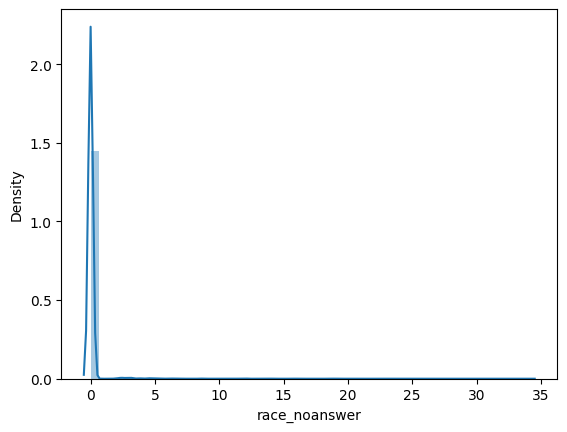

In [161]:
sns.distplot(unemploy1["race_noanswer"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/3092955060.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["race_other"])


<AxesSubplot: xlabel='race_other', ylabel='Density'>

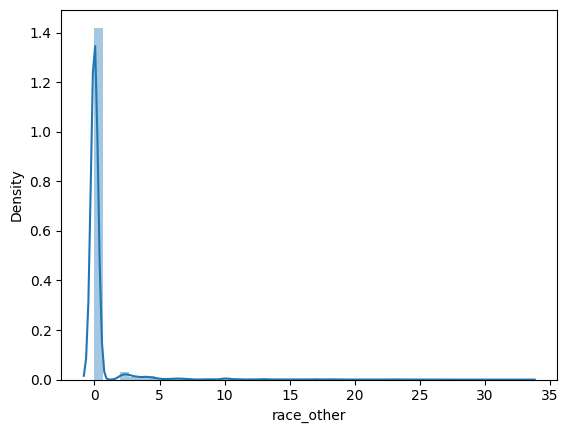

In [162]:
sns.distplot(unemploy1["race_other"])

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14498/2496172573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unemploy1["edu_hs_grad_equiv"])


<AxesSubplot: xlabel='edu_hs_grad_equiv', ylabel='Density'>

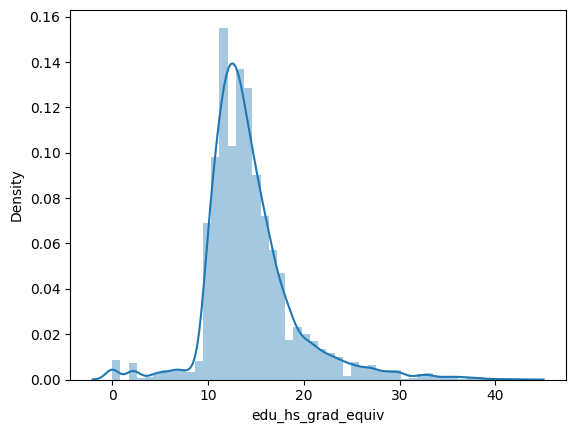

In [163]:
sns.distplot(unemploy1["edu_hs_grad_equiv"])

<AxesSubplot: >

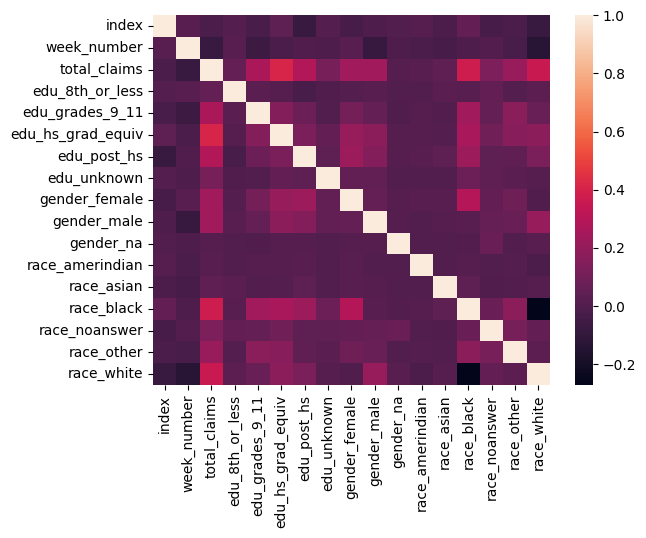

In [164]:
sns.heatmap(unemploy1.corr(method="spearman"))

In [165]:
trial["uuid"].unique()

KeyError: 'uuid'

In [166]:
trial["uu_id"].unique()

array(['9ee08e65a6fc00045b2c609903e65603',
       '184e8a1febbf737c9865b40ac43d92ee',
       '74c5fdc6aac736fa7cf9b5d45c501a03',
       '370a5fb730297d91eb3443d50582515e',
       'f63ddd4e3eb78163c5b06897f160db5f',
       'abf354f67e94370068c7141648efe147',
       '4da27496ea51392169807ce30edde6bf',
       '050a624d618a68e43fe31189909c644f',
       'eb17558d218dbd25eef1e19ecc78248a',
       '60946318ef5818fdfd1e931128ef391a',
       'd637ac269ed7d8542ec0a524d629ffaf',
       'def0c3fa02633394cd2b5041de7710ac',
       'a514bda8b5262164df92063a50786753',
       '5fe0dbe328785bc4e6bfe3b5609cf17d',
       '4258714000b9209afeb28e3032d8873d',
       '6877b5946ab2ee471e4c546252057f29',
       '7e3e3d2f2f2b4f20fa63c425271e08e4',
       'e76b18c02d69bdf2a261b733fd441673',
       '7f9c903be0e820137bd63ee9e9a97af8',
       'e654962bff96a16d2ce4a43206ca72b1',
       '931e7312a52b294244e6e05d33134c1e',
       'b94dcf22caa499f548c25164e13a8aba',
       '592a852d462dffe18312976a3da5b7d8',
       '666

In [167]:
trial["uu_id"].unique().sum()

'9ee08e65a6fc00045b2c609903e65603184e8a1febbf737c9865b40ac43d92ee74c5fdc6aac736fa7cf9b5d45c501a03370a5fb730297d91eb3443d50582515ef63ddd4e3eb78163c5b06897f160db5fabf354f67e94370068c7141648efe1474da27496ea51392169807ce30edde6bf050a624d618a68e43fe31189909c644feb17558d218dbd25eef1e19ecc78248a60946318ef5818fdfd1e931128ef391ad637ac269ed7d8542ec0a524d629ffafdef0c3fa02633394cd2b5041de7710aca514bda8b5262164df92063a507867535fe0dbe328785bc4e6bfe3b5609cf17d4258714000b9209afeb28e3032d8873d6877b5946ab2ee471e4c546252057f297e3e3d2f2f2b4f20fa63c425271e08e4e76b18c02d69bdf2a261b733fd4416737f9c903be0e820137bd63ee9e9a97af8e654962bff96a16d2ce4a43206ca72b1931e7312a52b294244e6e05d33134c1eb94dcf22caa499f548c25164e13a8aba592a852d462dffe18312976a3da5b7d8666c7361f0603c0cb4b783beddb796d8d022be7b24f488153a47c5ebaec904ebcb09047c9bc2c7afd2d74daa905f68bfb57c8824284adeabf73b43cf206b38197e2478517261a19d87c0ab2e737fb25f48752f9ac7c72819e56bcccceefee7a650247c509e6c47b550a516f66e35c1d1f1bebcc62175d8c0c05ba9e63aa68b2e3224483

In [168]:
trial["uu_id"].unique().count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [169]:
trial["uu_id"].unique().count

AttributeError: 'numpy.ndarray' object has no attribute 'count'